In [ ]:

# Import necessary libraries
import pandas as pd

# Load the files into DataFrames
cat = pd.read_csv('/mnt/data/aist_old.txt', sep='\t', header=None)
cat_new = pd.read_csv('/mnt/data/aist_new.txt', sep='\t', header=None)

# Display the first few rows to verify
cat.head(), cat_new.head()


## MAE and MSE comparision

In [ ]:
%pip install tabulate

### For multiple Categories

In [1]:
cat = df_aist
cat_new = df_aist_new

if len(cat.index) < len(cat_new.index):
    cat_new = cat_new.iloc[:len(df_aist.index)]
else:
    cat = cat.iloc[:len(df_aist_new.index)]

print(len(cat.index))
print(len(cat_new.index))
print("number of regions: ", len(cat.index)/4+1)

NameError: name 'df_aist' is not defined

In [2]:
def mae_mse(df):
    return df['Loss'].mean(), (df['Loss'] ** 2).mean()


In [3]:
from tabulate import tabulate
import pandas as pd

cat1 = cat[cat['Category'] == 1]
cat1_new = cat_new[cat_new['Category'] == 1]
cat2 = cat[cat['Category'] == 2]
cat2_new = cat_new[cat_new['Category'] == 2]
cat3 = cat[cat['Category'] == 3]
cat3_new = cat_new[cat_new['Category'] == 3]
cat4 = cat[cat['Category'] == 4]
cat4_new = cat_new[cat_new['Category'] == 4]



mae1, mse1 = mae_mse(cat1)
mae2, mse2 = mae_mse(cat2)
mae3, mse3 = mae_mse(cat3)
mae4, mse4 = mae_mse(cat4)

mae1_new, mse1_new = mae_mse(cat1_new)
mae2_new, mse2_new = mae_mse(cat2_new)
mae3_new, mse3_new = mae_mse(cat3_new)
mae4_new, mse4_new = mae_mse(cat4_new)

# print(mae1, mse1)
# print(mae2, mse2)
# print(mae3, mse3)
# print(mae4, mse4)
# print(mae1_new, mse1_new)
# print(mae2_new, mse2_new)
# print(mae3_new, mse3_new)
# print(mae4_new, mse4_new)

# Creating a DataFrame with the required format
results_formatted = pd.DataFrame({
    "Model": ["AIST", "", "BiTe CRIME", ""],
    "Criteria": ["MAE", "MSE", "MAE", "MSE"],
    "Category 1": [mae1, mse1, mae1_new, mse1_new],
    "Category 2": [mae2, mse2, mae2_new, mse2_new],
    "Category 3": [mae3, mse3, mae3_new, mse3_new],
    "Category 4": [mae4, mse4, mae4_new, mse4_new]
})

# Convert the dataframe to a tabulated table with grid format
table = tabulate(
    results_formatted, 
    headers="keys", 
    tablefmt="grid", 
    showindex=False, 
    floatfmt=".4f"  # Format floats to 4 decimal places
)

# Display the formatted table
print("\nMetrics by Category and Model:\n")
print(table)

NameError: name 'cat' is not defined

## Comparison of Accuracy Values for Region

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_62636\2173082342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aist_region1['Accuracy'] = (1 - df_aist_region1['Loss']) * 100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_62636\2173082342.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aist_new_region1['Accuracy'] = (1 - df_aist_new_region1['Loss']) * 100


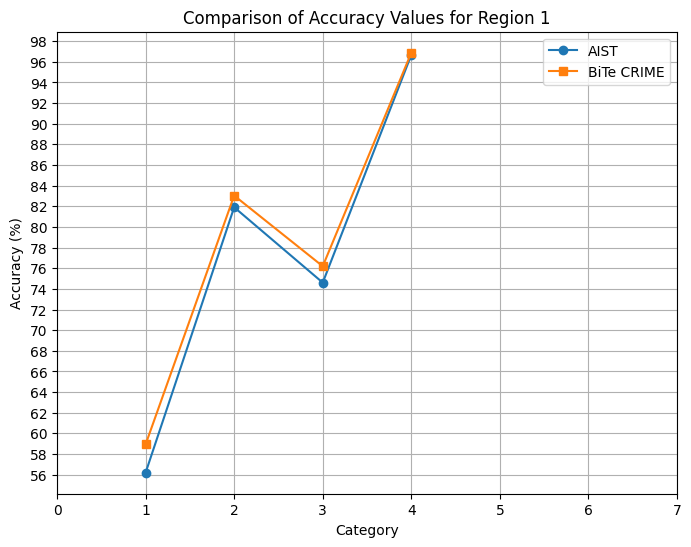

In [11]:
region = int(input("Enter the region number: "))

# Filter data for region 1
df_aist_region1 = df_aist[df_aist['Region'] == region]
df_aist_new_region1 = df_aist_new[df_aist_new['Region'] == region]

# Convert loss to accuracy percentage
df_aist_region1['Accuracy'] = (1 - df_aist_region1['Loss']) * 100
df_aist_new_region1['Accuracy'] = (1 - df_aist_new_region1['Loss']) * 100

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(df_aist_region1['Category'], df_aist_region1['Accuracy'], label='AIST', marker='o')
plt.plot(df_aist_new_region1['Category'], df_aist_new_region1['Accuracy'], label='BiTe CRIME', marker='s')

# Set x-axis ticks
plt.xticks(range(0, 8, 1))

# Set y-axis ticks with interval of 5
plt.yticks(np.arange(50, 100, 2))

plt.title(f'Comparison of Accuracy Values for Region {region}')
plt.xlabel('Category')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# # Add value labels
# for i, value in enumerate(df_aist_region1['Accuracy']):
#     plt.text(df_aist_region1['Category'].iloc[i], value, f'{value}%', ha='center', va='bottom')

# for i, value in enumerate(df_aist_new_region1['Accuracy']):
#     plt.text(df_aist_new_region1['Category'].iloc[i], value, f'{value}%', ha='center', va='top')

# Calculate y-axis limits to show differences clearly
y_min = min(df_aist_region1['Accuracy'].min(), df_aist_new_region1['Accuracy'].min())
y_max = max(df_aist_region1['Accuracy'].max(), df_aist_new_region1['Accuracy'].max())
y_range = y_max - y_min
plt.ylim(y_min - 0.05 * y_range, y_max + 0.05 * y_range)

plt.show()

In [108]:
df_aist_region1, df_aist_new_region1

(    Region  Category      Loss   Accuracy
 48       7         0  0.712458  28.754242
 49       7         1  1.450240 -45.023974
 50       7         2  0.239683  76.031746
 51       7         3  0.733527  26.647340
 52       7         4  0.217460  78.253971
 53       7         5  0.306351  69.364911
 54       7         6  0.096825  90.317460
 55       7         7  0.069841  93.015873,
     Region  Category      Loss   Accuracy
 48       7         0  0.788658  21.134227
 49       7         1  1.239135 -23.913510
 50       7         2  0.224702  77.529762
 51       7         3  0.656556  34.344395
 52       7         4  0.203869  79.613095
 53       7         5  0.287202  71.279762
 54       7         6  0.090774  90.922619
 55       7         7  0.065476  93.452381)

## Comparison of Accuracy Values for Category

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_62636\2313460827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Accuracy'] = (1 - df_cat['Loss']) * 100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_62636\2313460827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_new['Accuracy'] = (1 - df_cat_new['Loss']) * 100


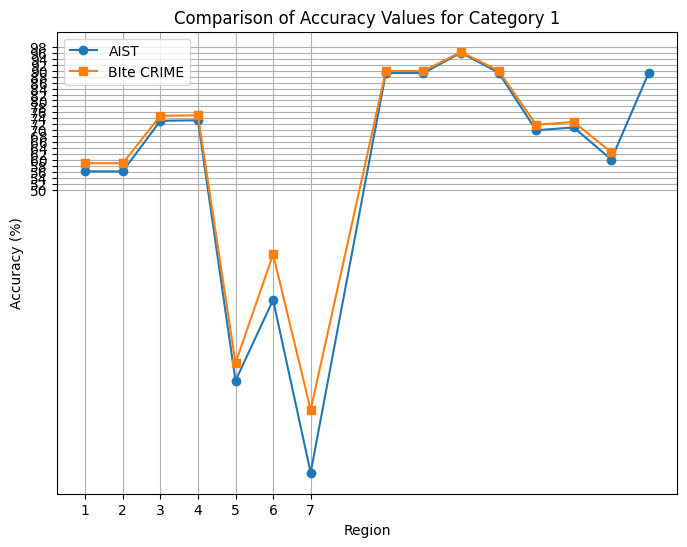

(    Region  Category      Loss   Accuracy
 0        1         1  0.438111  56.188942
 4        2         1  0.438095  56.190456
 8        3         1  0.268257  73.174259
 12       4         1  0.266667  73.333334
 16       5         1  1.141341 -14.134072
 20       6         1  0.869828  13.017195
 24       7         1  1.450240 -45.023974
 28       9         1  0.107937  89.206349
 32      10         1  0.107937  89.206349
 36      11         1  0.039683  96.031746
 40      12         1  0.106349  89.365079
 44      13         1  0.300000  70.000000
 48      14         1  0.290537  70.946304
 52      15         1  0.398413  60.158729
 56      16         1  0.106349  89.365079,
     Region  Category      Loss   Accuracy
 0        1         1  0.410714  58.928572
 4        2         1  0.410714  58.928573
 8        3         1  0.251488  74.851190
 12       4         1  0.250000  75.000000
 16       5         1  1.081845  -8.184532
 20       6         1  0.717163  28.283688
 24       

In [12]:
category = int(input("Enter value of category: "))

df_cat = df_aist[df_aist["Category"]==category]
df_cat_new = df_aist_new[df_aist_new["Category"]==category]

df_cat['Accuracy'] = (1 - df_cat['Loss']) * 100
df_cat_new['Accuracy'] = (1 - df_cat_new['Loss']) * 100

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(df_cat['Region'], df_cat['Accuracy'], label='AIST', marker='o')
plt.plot(df_cat_new['Region'], df_cat_new['Accuracy'], label='BIte CRIME', marker='s')

# Set x-axis ticks
plt.xticks(range(1, 8, 1))

# Set y-axis ticks with interval of 5
plt.yticks(np.arange(50, 100, 2))

plt.title(f'Comparison of Accuracy Values for Category {category}')
plt.xlabel(f'Region')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# # Add value labels
# for i, value in enumerate(df_aist_region1['Accuracy']):
#     plt.text(df_aist_region1['Category'].iloc[i], value, f'{value}%', ha='center', va='bottom')

# for i, value in enumerate(df_aist_new_region1['Accuracy']):
#     plt.text(df_aist_new_region1['Category'].iloc[i], value, f'{value}%', ha='center', va='top')

# Calculate y-axis limits to show differences clearly
y_min = min(df_cat['Accuracy'].min(), df_cat['Accuracy'].min())
y_max = max(df_cat['Accuracy'].max(), df_cat['Accuracy'].max())
y_range = y_max - y_min
plt.ylim(y_min - 0.05 * y_range, y_max + 0.05 * y_range)

plt.show()

df_cat, df_cat_new